In [1]:
import tensorflow as tf     
from tensorflow.keras import layers, models 
import matplotlib.pyplot as plt             

In [2]:
# Load the CIFAR-10 dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to range [0, 1] 
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0 
# Convert class vectors to one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step


In [3]:
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 10)


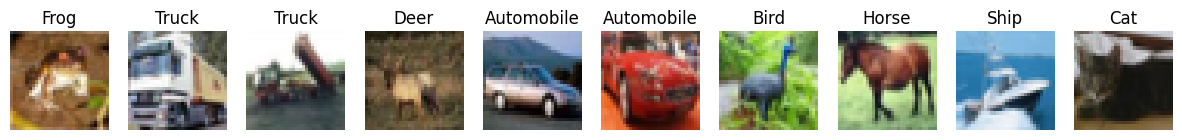

In [5]:
# Display a few images with their Labels 
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

fig, axes = plt.subplots (1, 10, figsize=(15, 5)) 
for i in range(10): 
    axes[i].imshow(x_train[i]) 
    axes[i].axis('off') 
    axes[i].set_title(class_names[y_train[i].argmax()]) 
plt.show()

In [6]:
def build_model():
    model = models.Sequential() 
    #Convolutional Block 1 
    model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(32, 32, 3))) 
    model.add(layers. MaxPooling2D((2, 2))) 
    
    #Convolutional Block 2 
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) 
    model.add(layers.MaxPooling2D((2, 2))) 

    #Convolutional Block 3 
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) 

    #Fully Connected Layers 
    model.add(layers.Flatten()) 
    model.add(layers.Dense(64, activation = 'relu')) 
    model.add(layers.Dense(10, activation='softmax')) # Output Layer for 10 classes

    return model 

# Build the model 
cnn_model = build_model() 
cnn_model.summary()

d:\Coding\AI-and-Data-Analytics-course-repo\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
cnn_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy']) 

# Train the model 
history = cnn_model.fit(x_train, y_train, 
                        epochs=10, batch_size=64, 
                        validation_data=(x_test, y_test)) 
#Evaluate on test data 
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2) 
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.3216 - loss: 1.8208 - val_accuracy: 0.5287 - val_loss: 1.3143
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5353 - loss: 1.2895 - val_accuracy: 0.5939 - val_loss: 1.1353
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.6049 - loss: 1.1211 - val_accuracy: 0.6149 - val_loss: 1.1023
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6403 - loss: 1.0256 - val_accuracy: 0.6345 - val_loss: 1.0361
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6771 - loss: 0.9300 - val_accuracy: 0.6694 - val_loss: 0.9410
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.7002 - loss: 0.8628 - val_accuracy: 0.6747 - val_loss: 0.9414
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7175 - loss: 0.8012 - val_accuracy: 0.6773 - val_loss: 0.9275
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7390 - loss: 0.7509 - 

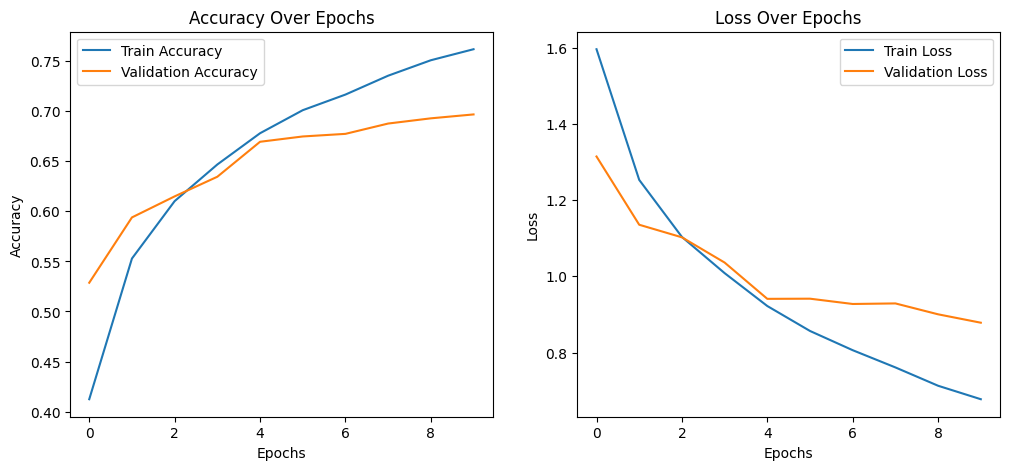

In [8]:
#Plot accuracy and Loss 
plt.figure(figsize=(12, 5)) 

#Accuracy plot 
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Train Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 


# Loss plot 
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Loss Over Epochs') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


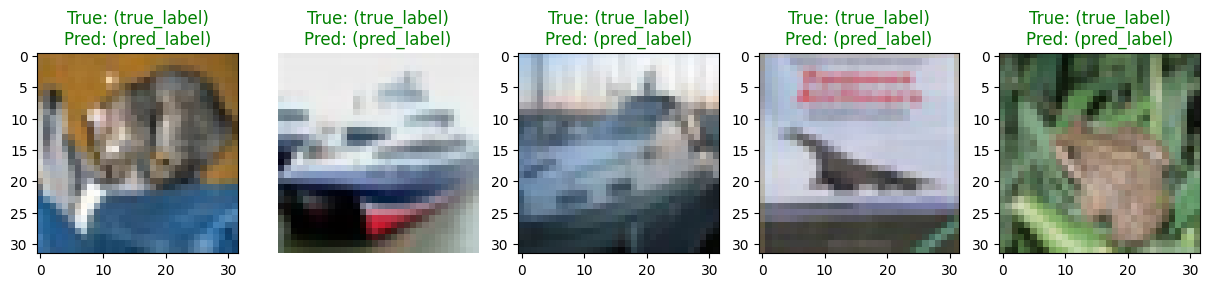

In [9]:
#Make predictions 
predictions = cnn_model.predict(x_test) 
# Display some predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 5)) 
for i in range(5): 
    axes[i].imshow(x_test[i]) 
    axes[1].axis('off') 
    pred_label = class_names[predictions[i].argmax()] 
    true_label = class_names[y_test[i].argmax()] 
    axes[i].set_title(f"True: (true_label)\nPred: (pred_label)", color="green" if pred_label == true_label else "red") 
plt.show()